In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import sklearn


# Feature Selection

#### Why Select Features?

    Tránh trang bị quá mức



    Dự đoán và đào tạo nhanh hơn

    Ít bộ nhớ hơn cho mô hình và tập dữ liệu

    Mô hình dễ hiểu hơn

#### Types of Feature Selection

    Unsupervised vs Supervised (không giám sát vs giám sát)
    

    Univariate vs Multivariate (đơn biến vs đa biến)

    Model based or not  (dựa trên mô hình hay không)

## Unsupervised Feature Selection

    Có thể loại bỏ thông tin quan trọng

    Dựa trên variance(phương sai): variance =  0 hoặc hầu như không đổi

    Dựa trên hiệp phương sai: loại bỏ các features tương quan

    PCA: loại bỏ các không gian con tuyến tính

In [14]:
from sklearn.preprocessing import scale
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_boston
boston_data = load_boston()

c:\Users\Minh\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

In [39]:
custom_data = (['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'])
custom_data

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [15]:
bos_pd = pd.DataFrame(boston_data.data)
bos_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [42]:
bos_pd.columns = boston_data.feature_names
bos_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
bos_pd['PRICE']=boston_data.target
bos_pd.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [60]:
from sklearn.preprocessing import scale


X = bos_pd[custom_data]
y = bos_pd['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_scaled = scale(X_train)

reg_1 = LinearRegression()
reg_1.fit(X_train, y_train)

y_train_predict_1 = reg_1.predict(X_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict_1)))
r2 = round(reg_1.score(X_train, y_train),2)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print(X.shape,y.shape)

RMSE is 4.431762564477935
R2 score is 0.77
(506, 13) (506,)


#### Phương pháp thống kê
Sử dụng VarianceThreshold

In [85]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification
X = bos_pd[custom_data]
y = bos_pd['PRICE']

print(X.shape)
sel= VarianceThreshold(threshold=(.8 * (1 - .8)))
X_new = sel.fit_transform(X)
print(X_new.shape)

# loại bỏ tính năng có phương sai k đáp ứng threshold=(.8 * (1 - .8)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0)
X_train_scaled = scale(X_train)

reg_1 = LinearRegression()
reg_1.fit(X_train, y_train)

y_train_predict_1 = reg_1.predict(X_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict_1)))
r2 = round(reg_1.score(X_train, y_train),2)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


(506, 13)
(506, 11)
RMSE is 4.547196945308531
R2 score is 0.76


#### Univariate feature selection¶

SelectKBest loại bỏ tất cả trừ K tính năng ghi điểm cao nhất

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X = bos_pd[custom_data]
y = bos_pd['PRICE']
X_new = SelectKBest(f_classif, k=1).fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0)
X_train_scaled = scale(X_train)

reg_1 = LinearRegression()
reg_1.fit(X_train, y_train)

y_train_predict_1 = reg_1.predict(X_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict_1)))
r2 = round(reg_1.score(X_train, y_train),2)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
# sai code

RMSE is 6.046492650967426
R2 score is 0.57


##### Recursive feature elimination

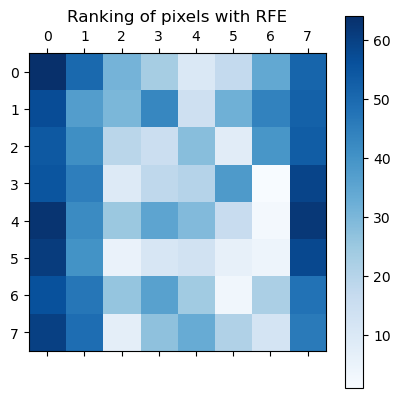

In [92]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

#### Feature selection using SelectFromModel

    Lựa chọn tính năng dựa trên L1
    (Các mô hình tuyến tính bị phạt với chuẩn L1 có các nghiệm thưa thớt: nhiều hệ số ước tính của chúng bằng 0. Khi mục tiêu là giảm tính chiều của dữ liệu để sử dụng với một bộ phân loại khác, chúng có thể được sử dụng cùng vớiSelectFromModel để chọn các hệ số khác 0)

In [103]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn import utils

X = bos_pd[custom_data]
y = bos_pd['PRICE']
print(X.shape)
lab = preprocessing.LabelEncoder()

X_transformed = lab.fit_transform(X)
# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(X)
# print(X_new.shape)

(506, 13)


ValueError: y should be a 1d array, got an array of shape (506, 13) instead.